# Calculating linear trends per pixel

In [17]:
#This first line will show plots produced by matplotlib inside this Jupyter notebook
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from dask.distributed import Client, progress
from collections import OrderedDict

In [18]:
client = Client(n_workers = 12)

In [19]:
session = cc.database.create_session()

## Accessing data

In [20]:
varDict = OrderedDict([
    ('surface_temp',{'model': 'ACCESS-OM2-01',
             'expt': '01deg_jra55v140_iaf_cycle2', # ACCESS-OM2-01 cycle 2
             'freq': '1 monthly',
             'offset': -273.15,
             'long_name': 'sea surface temperature',
             'short_name': 'SST',
             'unit': '$^\circ$C',
             'res': '0.1°'})
])

In [21]:
var_id = 'surface_temp'
sst = cc.querying.getvar(varDict[var_id]['expt'], var_id, session, frequency = varDict[var_id]['freq'], start_time = '1965-01', end_time = '1975-12')
sst = sst.sel(yt_ocean = slice(-90, -40))+varDict[var_id]['offset']

## Applying linear model via xarray function

In [22]:
sst

<xarray.DataArray 'surface_temp' (time: 135, yt_ocean: 808, xt_ocean: 3600)>
dask.array<add, shape=(135, 808, 3600), dtype=float32, chunksize=(1, 540, 720), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -40.18 -40.11 -40.03
  * time      (time) datetime64[ns] 1964-10-16T12:00:00 ... 1975-12-16T12:00:00

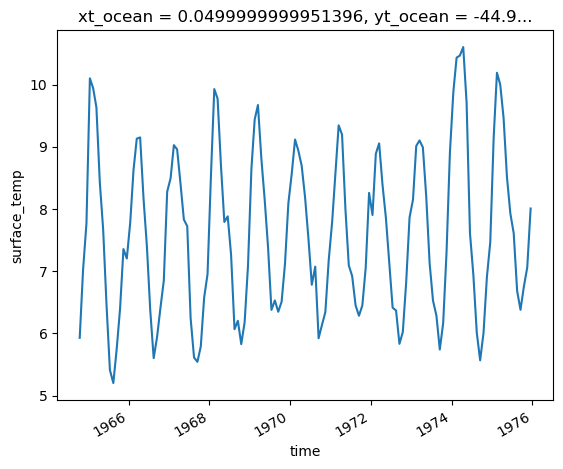

In [24]:
sst_test = sst.sel({'yt_ocean': -45, 'xt_ocean': 0}, method='nearest')
sst_test.plot()

In [25]:
sst_test.time

<xarray.DataArray 'time' (time: 135)>
array(['1964-10-16T12:00:00.000000000', '1964-11-16T00:00:00.000000000',
       '1964-12-16T12:00:00.000000000', '1965-01-16T12:00:00.000000000',
       '1965-02-15T00:00:00.000000000', '1965-03-16T12:00:00.000000000',
       '1965-04-16T00:00:00.000000000', '1965-05-16T12:00:00.000000000',
       '1965-06-16T00:00:00.000000000', '1965-07-16T12:00:00.000000000',
       '1965-08-16T12:00:00.000000000', '1965-09-16T00:00:00.000000000',
       '1965-10-16T12:00:00.000000000', '1965-11-16T00:00:00.000000000',
       '1965-12-16T12:00:00.000000000', '1966-01-16T12:00:00.000000000',
       '1966-02-15T00:00:00.000000000', '1966-03-16T12:00:00.000000000',
       '1966-04-16T00:00:00.000000000', '1966-05-16T12:00:00.000000000',
       '1966-06-16T00:00:00.000000000', '1966-07-16T12:00:00.000000000',
       '1966-08-16T12:00:00.000000000', '1966-09-16T00:00:00.000000000',
       '1966-10-16T12:00:00.000000000', '1966-11-16T00:00:00.000000000',
       '1966-12-16T12:00:00.000000000', '1967-01-16T12:00:00.000000000',
       '1967-02-15T00:00:00.000000000', '1967-03-16T12:00:00.000000000',
       '1967-04-16T00:00:00.000000000', '1967-05-16T12:00:00.000000000',
       '1967-06-16T00:00:00.000000000', '1967-07-16T12:00:00.000000000',
       '1967-08-16T12:00:00.000000000', '1967-09-16T00:00:00.000000000',
       '1967-10-16T12:00:00.000000000', '1967-11-16T00:00:00.000000000',
       '1967-12-16T12:00:00.000000000', '1968-01-16T12:00:00.000000000',
       '1968-02-15T12:00:00.000000000', '1968-03-16T12:00:00.000000000',
       '1968-04-16T00:00:00.000000000', '1968-05-16T12:00:00.000000000',
       '1968-06-16T00:00:00.000000000', '1968-07-16T12:00:00.000000000',
       '1968-08-16T12:00:00.000000000', '1968-09-16T00:00:00.000000000',
       '1968-10-16T12:00:00.000000000', '1968-11-16T00:00:00.000000000',
       '1968-12-16T12:00:00.000000000', '1969-01-16T12:00:00.000000000',
       '1969-02-15T00:00:00.000000000', '1969-03-16T12:00:00.000000000',
       '1969-04-16T00:00:00.000000000', '1969-05-16T12:00:00.000000000',
       '1969-06-16T00:00:00.000000000', '1969-07-16T12:00:00.000000000',
       '1969-08-16T12:00:00.000000000', '1969-09-16T00:00:00.000000000',
       '1969-10-16T12:00:00.000000000', '1969-11-16T00:00:00.000000000',
       '1969-12-16T12:00:00.000000000', '1970-01-16T12:00:00.000000000',
       '1970-02-15T00:00:00.000000000', '1970-03-16T12:00:00.000000000',
       '1970-04-16T00:00:00.000000000', '1970-05-16T12:00:00.000000000',
       '1970-06-16T00:00:00.000000000', '1970-07-16T12:00:00.000000000',
       '1970-08-16T12:00:00.000000000', '1970-09-16T00:00:00.000000000',
       '1970-10-16T12:00:00.000000000', '1970-11-16T00:00:00.000000000',
       '1970-12-16T12:00:00.000000000', '1971-01-16T12:00:00.000000000',
       '1971-02-15T00:00:00.000000000', '1971-03-16T12:00:00.000000000',
       '1971-04-16T00:00:00.000000000', '1971-05-16T12:00:00.000000000',
       '1971-06-16T00:00:00.000000000', '1971-07-16T12:00:00.000000000',
       '1971-08-16T12:00:00.000000000', '1971-09-16T00:00:00.000000000',
       '1971-10-16T12:00:00.000000000', '1971-11-16T00:00:00.000000000',
       '1971-12-16T12:00:00.000000000', '1972-01-16T12:00:00.000000000',
       '1972-02-15T12:00:00.000000000', '1972-03-16T12:00:00.000000000',
       '1972-04-16T00:00:00.000000000', '1972-05-16T12:00:00.000000000',
       '1972-06-16T00:00:00.000000000', '1972-07-16T12:00:00.000000000',
       '1972-08-16T12:00:00.000000000', '1972-09-16T00:00:00.000000000',
       '1972-10-16T12:00:00.000000000', '1972-11-16T00:00:00.000000000',
       '1972-12-16T12:00:00.000000000', '1973-01-16T12:00:00.000000000',
       '1973-02-15T00:00:00.000000000', '1973-03-16T12:00:00.000000000',
       '1973-04-16T00:00:00.000000000', '1973-05-16T12:00:00.000000000',
       '1973-06-16T00:00:00.000000000', '1973-07-16T12:00:00.000000000',
       '1973-08-16T12:00:00.000000000', '1973-09-16T00:00:00.000000000',
       '1973-10-16T1

In [32]:
coefficients = sst_test.polyfit(dim = 'time', deg = 1)
coef = coefficients.polyfit_coefficients.values*1e9*60*60*24*30
coef

array([3.18822409e-03, 1.97168882e+16])

In [27]:
vals = sst_test.values
time_index = np.arange(sst_test.time.size)
vals2 = vals.reshape(len(time_index), -1)
regressions = np.polyfit(time_index, vals2, 1)
regressions

array([[3.23768581e-03],
       [7.40436705e+00]])

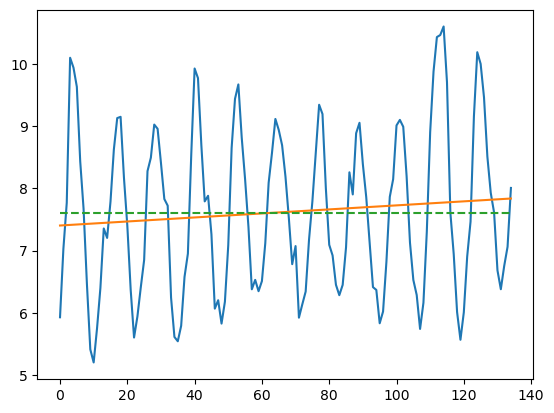

In [36]:
time_months = np.arange(sst_test.time.values.size)
fit = regressions[0] * time_months + regressions[1]
fit2 = coefficients.polyfit_coefficients.values[0] * time_months + coefficients.polyfit_coefficients.values[1]
plt.plot(time_months, sst_test.values)
plt.plot(time_months, fit)
plt.plot(time_months, fit2, linestyle = "--")

In [41]:
vals = sst_test.values
years = sst_test.indexes['time'].year
vals2 = vals.reshape(len(years), -1)
regressions = np.polyfit(years, vals2, 1)
trends = regressions[0,:].reshape(vals.shape[1], vals.shape[2])
x = xr.DataArray(data = trends, dims = ["yt_ocean", "xt_ocean"], 
                 coords = dict(xt_ocean = sst.xt_ocean.values, yt_ocean = sst.yt_ocean.values))
x.plot()
#Results make more sense

IndexError: tuple index out of range

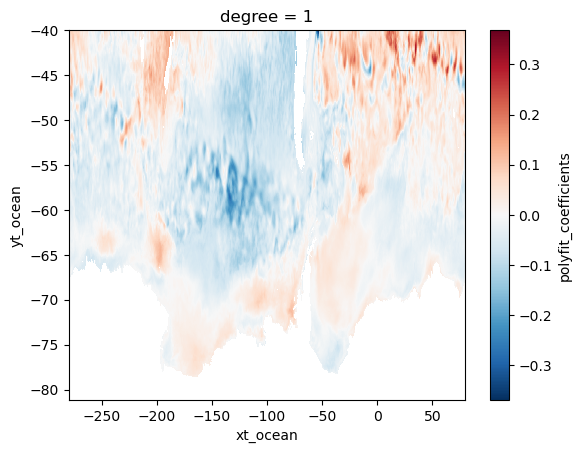

In [42]:
results_LM = sst.polyfit(dim = 'time', deg = 1)

#Plotting first line of coefficients - Needs to be converted from nanoseconds to months
(results_LM.polyfit_coefficients[0]*3.80517183071e16).plot()

## Applying linear model via numpy

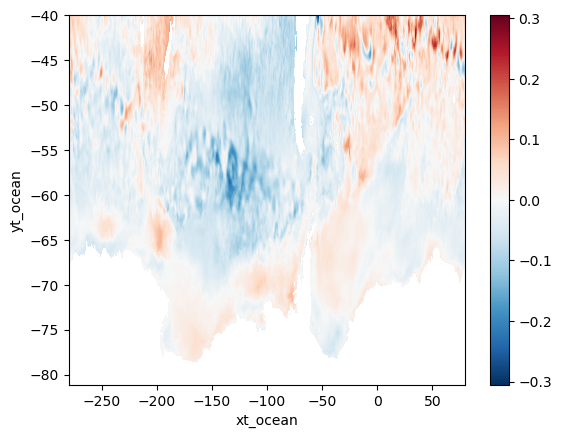

In [40]:
vals = sst.values
time = (sst.indexes['time'].year)+((sst.indexes['time'].month)/12)
vals2 = vals.reshape(len(time), -1)
regressions = np.polyfit(time, vals2, 1)
trends = regressions[0,:].reshape(vals.shape[1], vals.shape[2])
x = xr.DataArray(data = trends, dims = ["yt_ocean", "xt_ocean"], 
                 coords = dict(xt_ocean = sst.xt_ocean.values, yt_ocean = sst.yt_ocean.values))
x.plot()
#Results make more sense

## Plotting SST data

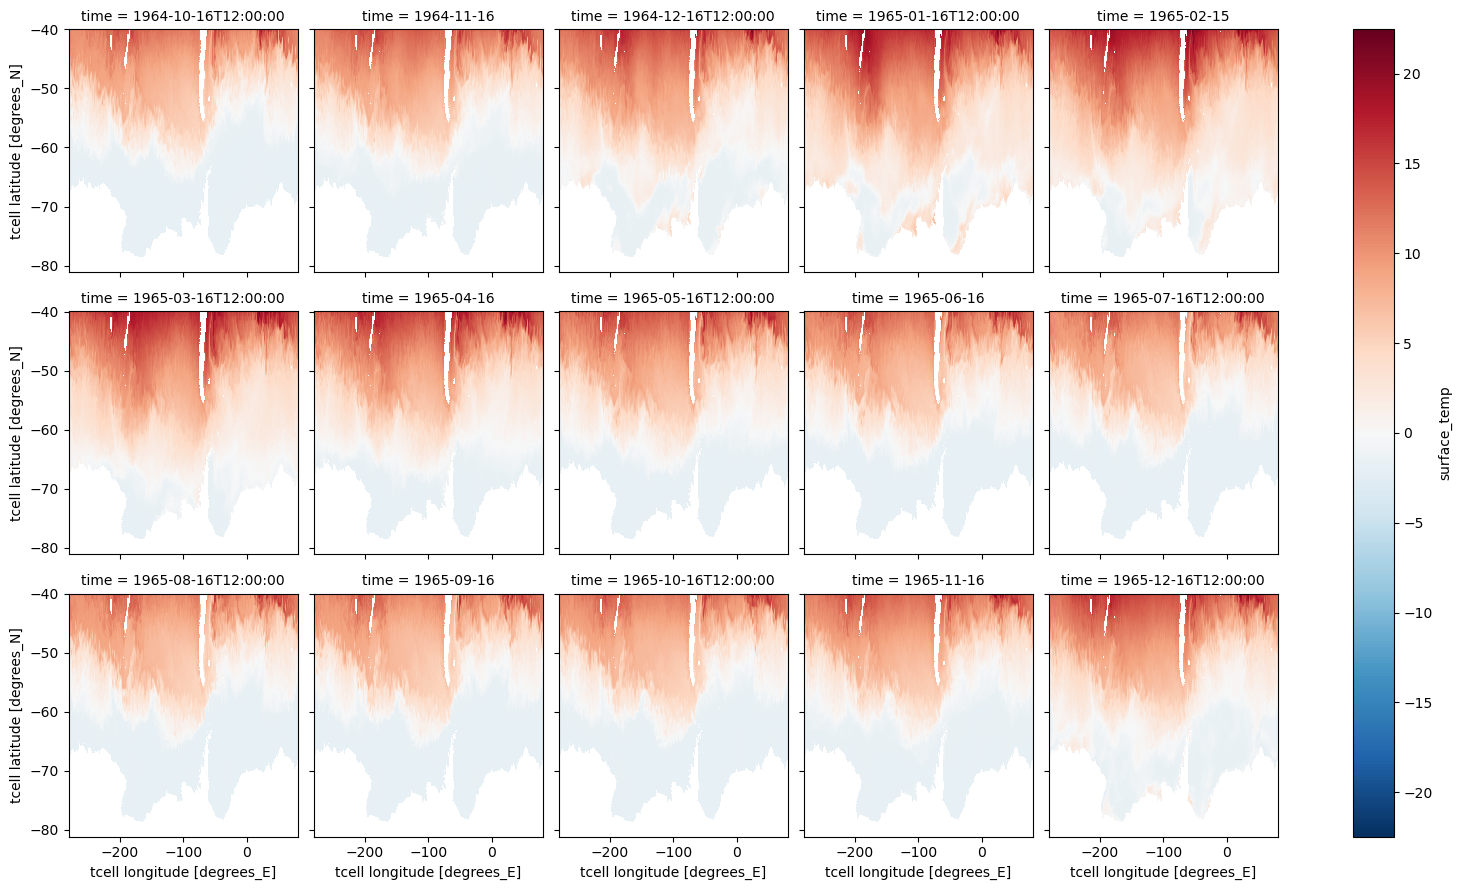

In [46]:
sst[0:15].plot(col = 'time', col_wrap = 5)

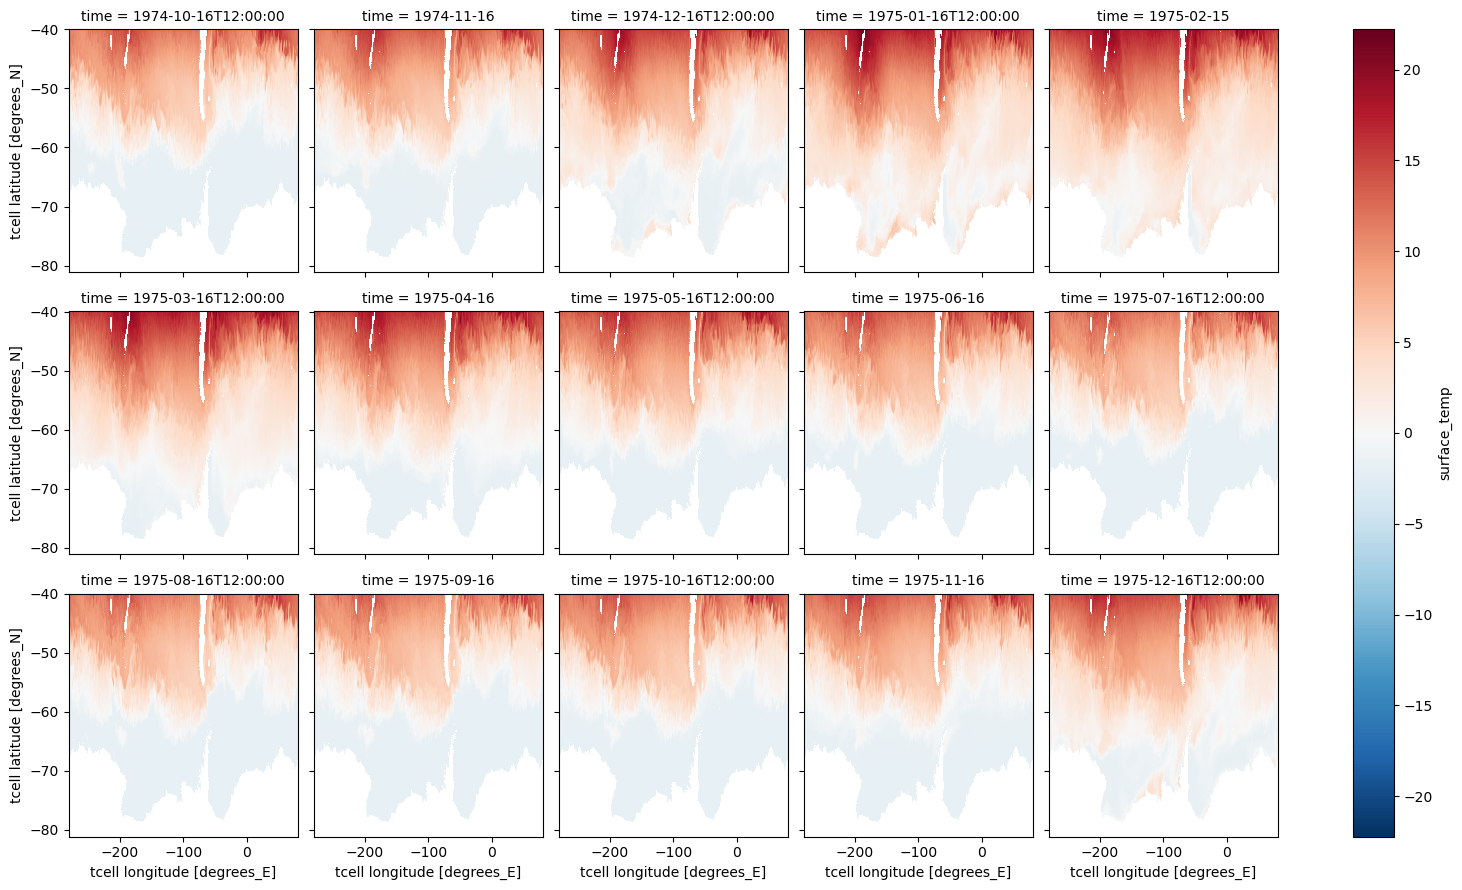

In [47]:
sst[-15:].plot(col = 'time', col_wrap = 5)